# Laboratory Task 4 – PyTorch Regression

**Name:** Joanna Reyda Santos  
**Section:** DS4A  

**Instruction:** Train a linear regression model in PyTorch using a regression dataset. Use the following parameters.

- Criterion: MSE Loss
- Fully Connected Layers x 2
- Batch Size: 8
- Optimizer: SGD
- Epoch: 1000

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Generate a simple regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Scale inputs and outputs for stable training
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

# Convert to tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader
BATCH_SIZE = 8
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

In [3]:
# Two fully connected layers as specified
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)  # input layer → hidden layer
        self.fc2 = nn.Linear(8, 1)  # hidden layer → output layer
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Initialize model
model = LinearRegressor()

In [4]:
# Define Loss Function and Optimizer
criterion = nn.MSELoss()                # Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.01)
EPOCHS = 1000

In [5]:
# Training Loop
loss_history = []

for epoch in range(EPOCHS):
    for inputs, targets in train_loader:
        # Forward pass
        preds = model(inputs)
        loss = criterion(preds, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_history.append(loss.item())

    # Display every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{EPOCHS}] - Loss: {loss.item():.6f}")

Epoch [100/1000] - Loss: 0.058633


Epoch [200/1000] - Loss: 0.028024


Epoch [300/1000] - Loss: 0.052114


Epoch [400/1000] - Loss: 0.057646


Epoch [500/1000] - Loss: 0.018505


Epoch [600/1000] - Loss: 0.035623


Epoch [700/1000] - Loss: 0.029204


Epoch [800/1000] - Loss: 0.019728


Epoch [900/1000] - Loss: 0.010696


Epoch [1000/1000] - Loss: 0.049361



Final Test MSE Loss: 0.036191


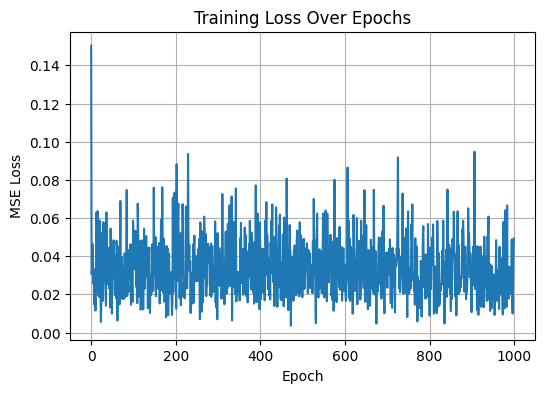

In [6]:
# Evaluate model on test data
model.eval()
with torch.no_grad():
    preds = model(X_test)
    test_loss = criterion(preds, y_test)

print(f"\nFinal Test MSE Loss: {test_loss.item():.6f}")

# Plot training loss
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

Sample Predictions:
 tensor([[ 0.2300],
        [-0.1828],
        [-0.4389],
        [-0.1892],
        [ 0.3886],
        [ 0.0115],
        [ 1.5881],
        [-0.3640]])
Actual Targets:
 tensor([[ 0.1446],
        [-0.0918],
        [-0.2147],
        [-0.3207],
        [ 0.4311],
        [-0.3462],
        [ 1.5712],
        [-0.5152]])


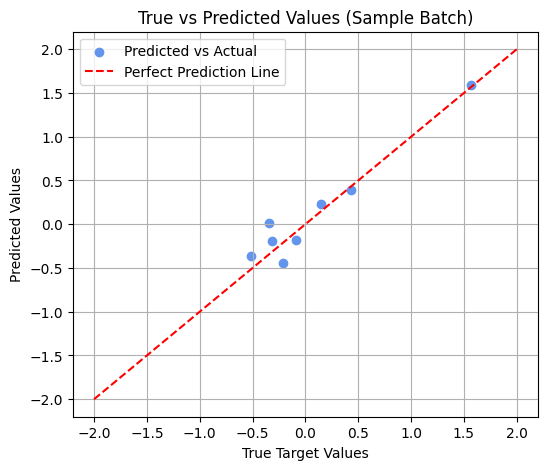

In [7]:
# Compare predicted vs. true target values (visual + print)
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    sample_inputs, sample_targets = next(iter(train_loader))
    predictions = model(sample_inputs)

# Print a few values
print("Sample Predictions:\n", predictions[:8])
print("Actual Targets:\n", sample_targets[:8])

# Visualization
plt.figure(figsize=(6,5))
plt.scatter(sample_targets.numpy(), predictions.numpy(), color='cornflowerblue', label='Predicted vs Actual')
plt.plot([-2, 2], [-2, 2], 'r--', label='Perfect Prediction Line')  # reference line
plt.xlabel("True Target Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Sample Batch)")
plt.legend()
plt.grid(True)
plt.show()

#### Reflection

Based on the results, the model’s loss gradually decreased over 1000 epochs, showing that the regression model successfully learned the relationship between the input and target values. The predicted vs. actual scatter plot also showed that the points aligned closely with the perfect prediction line, indicating good accuracy. This exercise helped me understand how PyTorch automates gradient computation and how adjusting hyperparameters like learning rate can affect model convergence.